# Momentum, Impulse, and Energy Conservation: Capstone Project

This notebook is used for analysis of the IOLab data for capstone project, PHYSICS 5BL.

In [1]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import numpy as np
plt.rcParams.update({'font.size': '16'})

# Data loading and interpolation

In [17]:
# check the data and headers
file = open('11-17 data/5g-6.5cm.csv', 'r')
print(file.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [135]:
# Load IOLab data--no interpolation needed here.
t, F = np.loadtxt('11-17 data/10g-10.7cm.csv', delimiter=",", skiprows=1, usecols=(0,1), unpack=True)

In [136]:
class bbox_select():
    %matplotlib notebook 

    def __init__(self, datx, daty):
        self.datax, self.datay = datx, daty
        self.results = []
        self.selected_points = []
        self.indices = []
        self.times = []
        self.fig, self.ax = plt.subplots()
        self.ax.plot(datx, daty)
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        
        disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)
        
        integrate_button = widgets.Button(description="Integrate region")
        Disp.display(integrate_button)
        integrate_button.on_click(self.integrate_region)

    def onclick(self, event):
        x, y = event.xdata, event.ydata
        if np.abs(y) < 0.05:
            self.selected_points.append([x, y])
            self.indices.append(np.argmin(np.abs(self.datax - x)))
            self.ax.axvline(x, color='red')
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))

    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)
        
    def integrate_region(self, _):
        assert len(self.indices) == 2, 'bad num indices'
        left, right = self.indices[0], self.indices[1]
        int_result = np.trapz(self.datay[left:right], self.datax[left:right])
        self.results.append(int_result)
        self.times.append(self.datax[right] - self.datax[left])
        self.selected_points = []
        self.indices = []

<IPython.core.display.Javascript object>


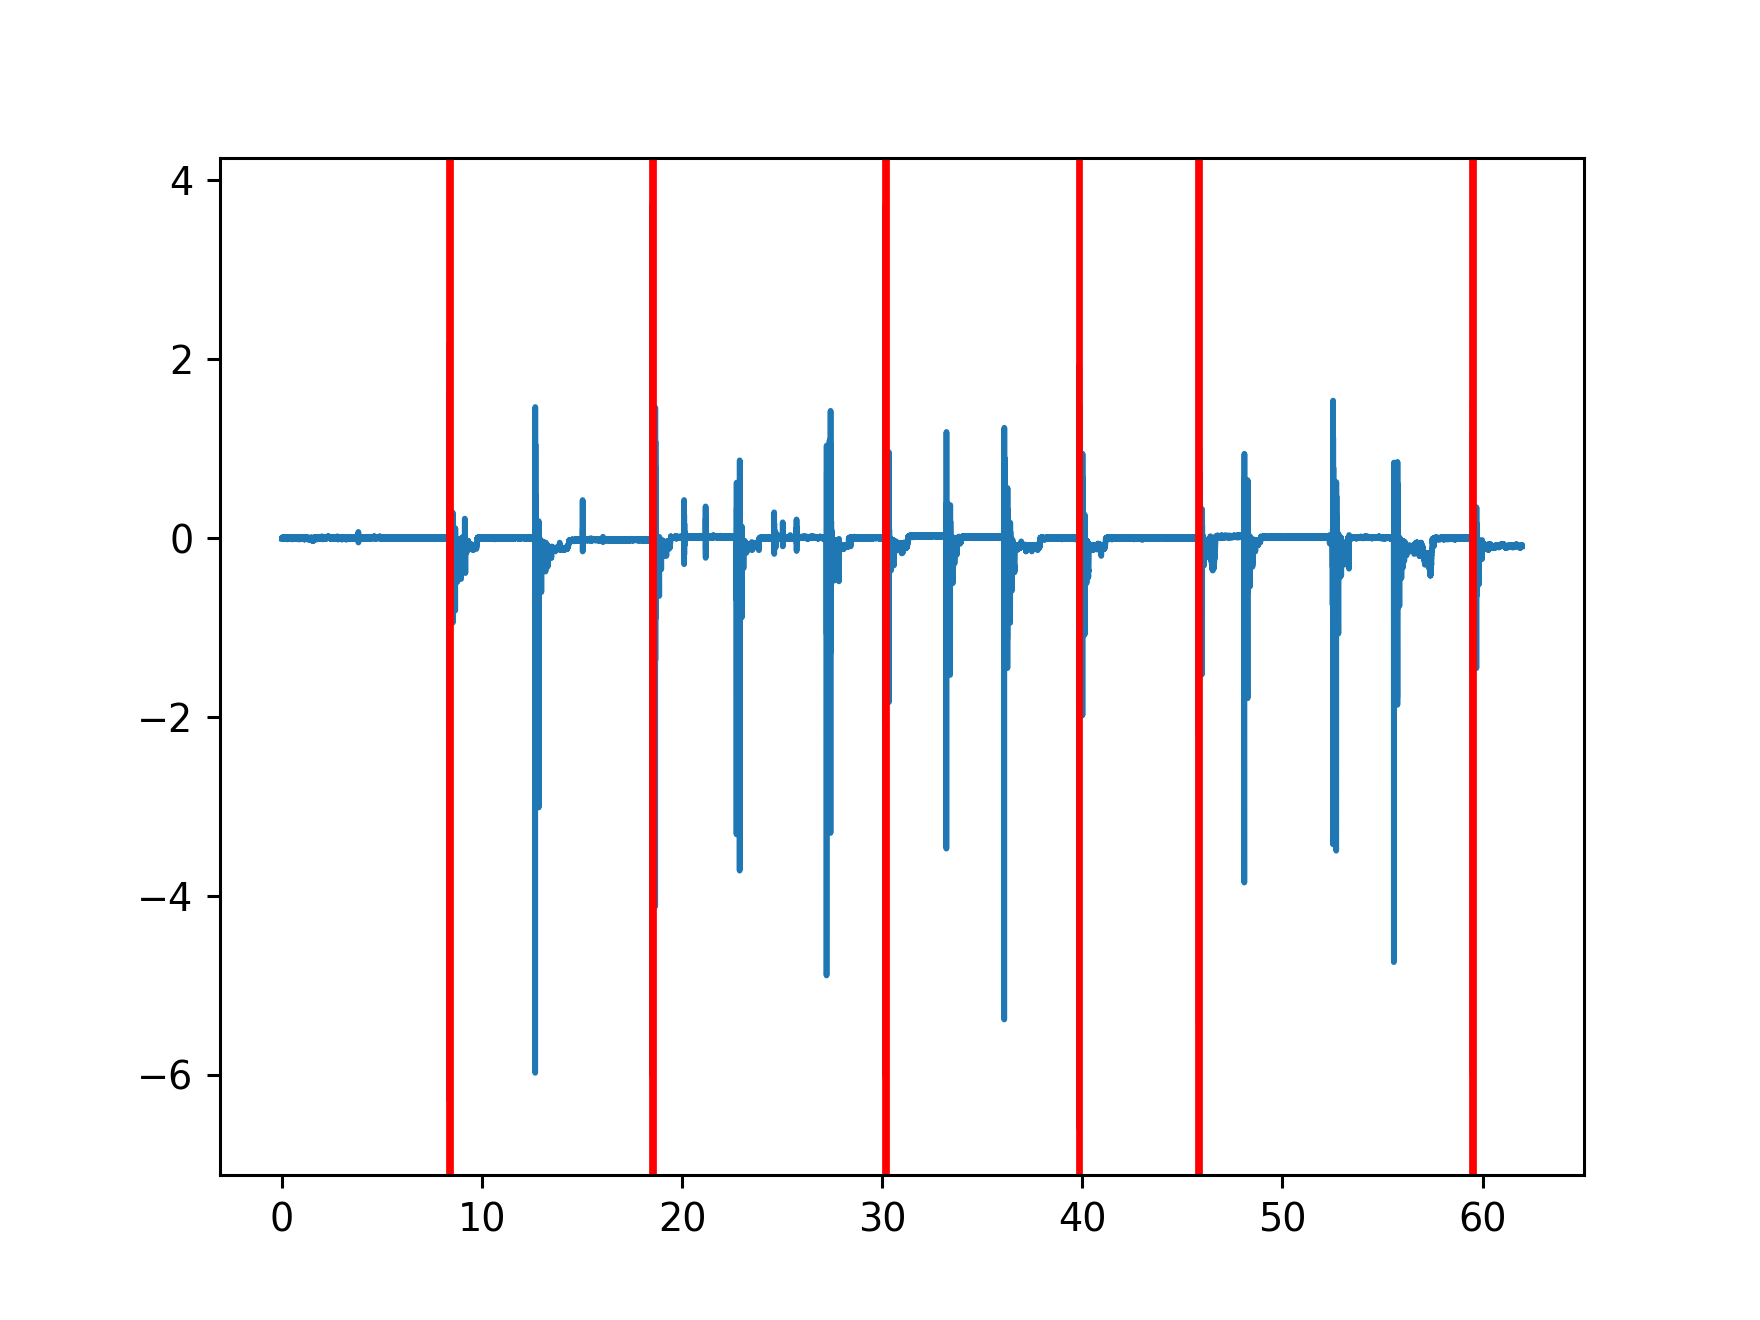

Button(description='Disconnect mpl', style=ButtonStyle())

Button(description='Integrate region', style=ButtonStyle())

In [137]:
a = bbox_select(t, F)

In [36]:
a.selected_points, a.indices, a.results, a.times

([],
 [],
 [-0.008526894993546863,
  -0.008619655655012215,
  -0.008603445713427194,
  -0.009597886158148813,
  -0.0093345123325137,
  -0.00943480136078012],
 [0.045833587646484375,
  0.037499427795410156,
  0.042499542236328125,
  0.042499542236328125,
  0.03583526611328125,
  0.04541778564453125])

## -a.results - a.times * 9.8 * mass is the actual data

In [138]:
def ssd(sample):
    var = np.var(sample)
    return np.sqrt(var * len(sample) / (len(sample) - 1))

def sem(sample):
    return ssd(sample) / np.sqrt(len(sample))

def paste(arr):
#     print('mean:', np.mean(arr),
#           'sd:', ssd(arr),
#           'sem:', sem(arr))
    print('mean±sem: {m:.7f} ± {e:.7f}'.format(m=np.mean(arr), e=sem(arr)))
    return np.mean(arr), sem(arr)

In [139]:
m = 10*10**(-3)
raw_dps = np.array(a.results) * (-1)
raw_mgts = np.array(a.times) * 9.8 * m
raw_data = raw_dps - raw_mgts

In [140]:
print('raw_dps')
for d in raw_dps:
    print(d)

print('raw_times')
for d in a.times:
    print(d)

print('net_dp')
for d in raw_data:
    print(d)


raw_dps
0.021994935390364873
0.019882805660951113
0.01869850951226337
0.021872628952986528
0.019545752658171853
0.022023020526638397
raw_times
0.08125019100000053
0.08749961000000184
0.09624861999999723
0.06750106999999872
0.08916855000000368
0.06624984999999839
net_dp
0.01403241667236482
0.011307843880950932
0.009266144752263639
0.015257524092986653
0.010807234758171491
0.015530535226638553


In [141]:
l, e = paste(raw_data)

mean±sem: 0.0127003 ± 0.0010589


In [2]:
x_data_1 = np.array([3.2, 5.3, 6.5, 8.8, 10.5, 11.9, 13.2])
x_data_1 /= 100
y_data_1 = np.array([0.0037040, 0.0046073, 0.0069813, 0.0067500, 0.0086984, 0.0078607, 0.0078719]) # dp
y_data_1_v = y_data_1 / 0.005 # v
y_data_1_sq = y_data_1_v ** 2 # v^2

y_err_1 = np.array([0.0001694, 0.0002398, 0.0002188, 0.0001847, 0.0002222, 0.0007863, 0.0002111])
y_err_1_v = y_data_1_v * np.sqrt((y_err_1 / y_data_1)**2 + (0.1/5)**2)
y_err_1_sq = 2 * y_data_1_v * y_err_1_v

print(y_data_1_sq, y_err_1_sq)

x_data_2 = np.array([3.7, 5, 6.8, 7.9, 8.5, 10.7])
x_data_2 /= 100
y_data_2 = np.array([0.0084768, 0.0092194, 0.0103604, 0.014792, 0.0113161, 0.0127003]) # dp
y_data_2_v = y_data_2 / 0.01 # v
y_data_2_sq = y_data_2_v ** 2 # v^2

y_err_2 = np.array([0.0003901, 0.0006680, 0.0006489, 0.0004648, 0.0008513, 0.0010589])
y_err_2_v = y_data_2_v * np.sqrt((y_err_2 / y_data_2)**2 + (0.1/5)**2)
y_err_2_sq = 2 * y_data_2_v * y_err_2_v

print(y_data_2_sq, y_err_2_sq)

[0.54878464 0.84908853 1.94954199 1.8225     3.0264865  2.47162418
 2.47867238] [0.05478652 0.0946873  0.14496257 0.12353979 0.19637614 0.50425623
 0.16584126]
[0.71856138 0.84997336 1.07337888 2.18803264 1.28054119 1.6129762 ] [0.07211171 0.12777742 0.14114597 0.16299693 0.19936044 0.27659705]


In [3]:
y_data_sq = np.concatenate((y_data_1_sq, y_data_2_sq))
y_err_sq = np.concatenate((y_err_1_sq, y_err_2_sq))
x_data = np.concatenate((x_data_1, x_data_2))

## Fit
From the theory, we define the model $I_{net}=\Delta p=-\int Fdt-mgt=p_0=mv=m\sqrt{2gh}=m\sqrt{2g}\sqrt{h}=C\sqrt{h}$ for a nonlinear fit, where $h$ is the height of the drop.

### Define the model:

In [4]:
def nonlinear_model(h, m):
    """Parameters are C;
    independent variable is h.
    Returns the expected dp."""
    return m * np.sqrt(h)

def linear_model(h2, A, c):
    return A * h2 + c

### Choose the model and initial fit parameter values then graph:


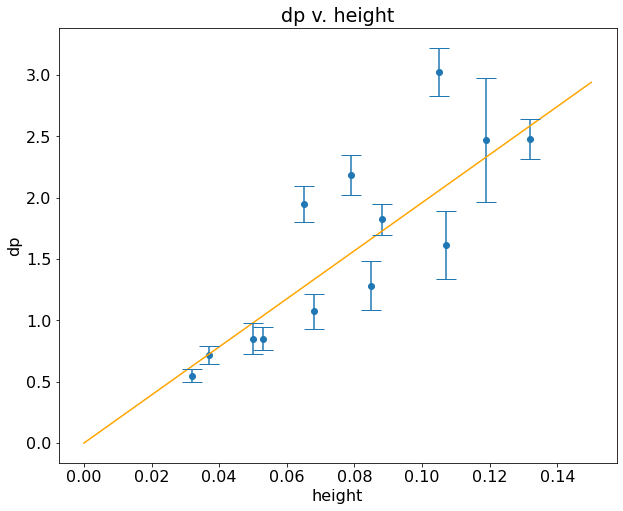

In [5]:
plt.figure(figsize=(10, 8))

# Initial guess values of fit parameters
cinit = 0
Ainit = 19.6

# Graph
space = np.linspace(0, 0.15)
plt.plot(space, linear_model(space, Ainit, cinit), color='orange')
plt.scatter(x_data, y_data_sq)
plt.errorbar(x_data, y_data_sq, yerr=y_err_sq, fmt='none', capsize=10)
plt.xlabel('height')
plt.ylabel('dp')
plt.title('dp v. height')
plt.show()

## Perform the fit then plot

In [10]:
# Perform the fit
start_pars = [Ainit, cinit]
pars, cov = opt.curve_fit(linear_model, x_data, y_data_sq, p0=start_pars)

[A, c] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[21.0031829   4.18481145]
 [-0.04254497  0.35170044]]


In [11]:
# Values predicted from fit
ypred = linear_model(space, A, c)

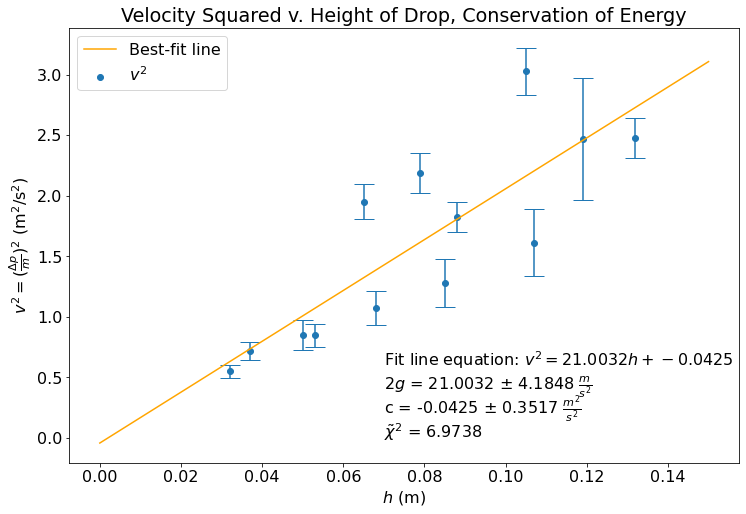

In [15]:
## Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8))

# Data and fit
plt.scatter(x_data, y_data_sq, label='$v^2$')
plt.errorbar(x_data, y_data_sq, yerr=y_err_sq, capsize=10, fmt='none')
plt.plot(space, ypred, color='orange', label='Best-fit line')

# Axes label and title
plt.legend()
plt.xlabel('$h$ (m)')
plt.ylabel('$v^2=(\\frac{\Delta p}{m})^2$ (m$^2$/s$^2$)')
plt.title("Velocity Squared v. Height of Drop, Conservation of Energy")



# Text
plt.text(0.07, 0.4, "2$g$ = %5.4f \u00b1 %5.4f $\\frac{m}{s^2}$" % (pars[0], std_errs[0]))
plt.text(0.07, 0.2, "c = %5.4f \u00b1 %5.4f $\\frac{m^2}{s^2}$" % (pars[1], std_errs[1]))
plt.text(0.07, 0.6, "Fit line equation: $v^2=%5.4f h+%5.4f}$" %
         (pars[0], pars[1]))
plt.text(0.07, 0, '$\\tilde{\\chi}^2$ = %5.4f' % r_chi2)


plt.savefig('fig-1.png')

In [8]:
def chisq(predicted, observed, errors):
    res = np.array(observed)-np.array(predicted)
    print(res, errors)
    norm_res = res / errors
    return np.sum(norm_res**2)


chi2_prop = chisq(linear_model(x_data, A, c), y_data_sq, y_err_sq)

r_chi2 = chi2_prop / 11

print('χ2 ={0:.3f}'.format (r_chi2))

[-0.08077224 -0.22153519  0.62688007  0.01676488  0.86369727  0.01479039
 -0.25120278 -0.01601141 -0.15764081 -0.31229258  0.57132617 -0.46218438
 -0.5918194 ] [0.05478652 0.0946873  0.14496257 0.12353979 0.19637614 0.50425623
 0.16584126 0.07211171 0.12777742 0.14114597 0.16299693 0.19936044
 0.27659705]
χ2 =6.974


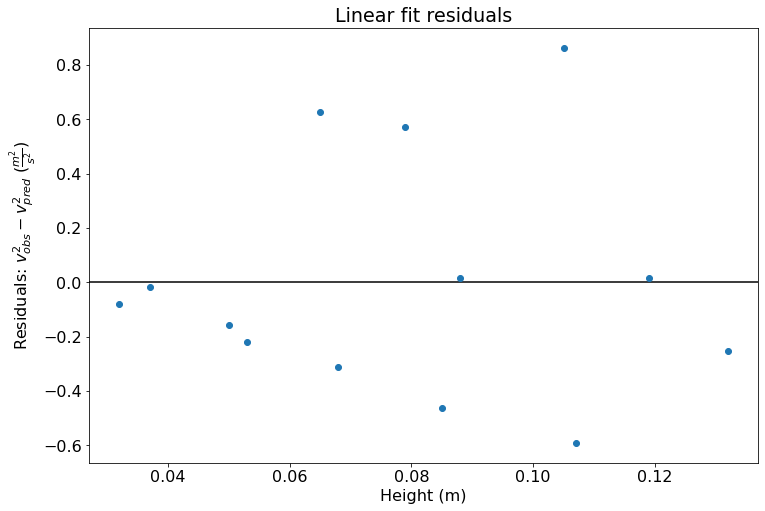

In [10]:
# Residuals
r_lin = y_data_sq - linear_model(x_data, A, c)

# Sets figure size etc.
fig2=plt.figure(figsize=(12, 8))

# Residuals
plt.errorbar(x_data, r_lin, fmt='o')
plt.axhline(color='k') # 0 line for reference

# Axes label and title
plt.title("Linear Fit Residuals, Normalized")
plt.xlabel("Height (m)")
plt.ylabel("Residuals: $v^2_{obs}-v^2_{pred}$ ($\\frac{m^2}{s^2}$)")
# plt.show()
plt.savefig('resids.png')